# Top

Udacity course: Machine Learning for Trading.

https://classroom.udacity.com/courses/ud501

In [1]:
# Standard
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Custom
import finance_utils as fu
#import ystockquote as ysq
#import technical_indicators as ti
import stock_db_mgr as sdm

In [2]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [15, 6]

# Set seaborn plot theme:
sns.set_theme()

In [3]:
# Reset random number for repeatability
np.random.seed(0)

Note: before lesson 7, refer to udacity.py

# Lessons 1-6 ?

In [4]:
start_date = datetime.date(2010, 1, 1)
end_date  = datetime.date(2014, 1, 1)
#end_date = datetime.date.today()

In [5]:
db = sdm.StockDBMgr('stock_db/test', start_date, end_date)

## Test pandas

In [6]:
df = db.get_symbol_data('AAPL')

In [7]:
df.head()

AAPL,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,6.508333,6.540961,6.476314,6.526019,493729600.0
2010-01-05,6.544012,6.574200,6.502844,6.537303,601904800.0
2010-01-06,6.537303,6.563223,6.426609,6.433318,552160000.0
2010-01-07,6.457103,6.464727,6.374769,6.421425,477131200.0
2010-01-08,6.412888,6.464728,6.375076,6.464118,447610800.0


In [8]:
df.describe()

AAPL,Open,High,Low,Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,12.842877,12.961483,12.701145,12.833138,5.064315e+08
std,3.939765,3.970217,3.898080,3.931205,2.341637e+08
min,5.866130,5.976823,5.801484,5.856373,1.574944e+08
25%,9.911770,9.939900,9.808470,9.904449,3.410386e+08
50%,12.450010,12.567788,12.287099,12.427058,4.475954e+08
75%,16.252710,16.417590,15.966473,16.180492,6.061419e+08
max,21.511255,21.592716,21.424278,21.501759,1.880998e+09


In [9]:
df.iloc[10:21]

AAPL,Open,High,Low,Close,Volume
Date,,,,,
2010-01-19,6.352815,6.562004,6.319577,6.557430,7.300076e+08
2010-01-20,6.553465,6.572981,6.388492,6.456494,6.121528e+08
2010-01-21,6.467166,6.504673,6.318659,6.344884,6.081544e+08
2010-01-22,6.305549,6.327504,6.012197,6.030188,8.817676e+08
2010-01-25,6.175340,6.242122,6.104594,6.192417,1.065700e+09
2010-01-26,6.280239,6.516872,6.177474,6.279934,1.867110e+09
2010-01-27,6.307682,6.421424,6.084466,6.339091,1.722568e+09
2010-01-28,6.249134,6.266516,6.059157,6.077148,1.173502e+09
2010-01-29,6.131734,6.165887,5.801484,5.856678,1.245952e+09


## Test plot

In [10]:
df = db.get_symbol_data('IBM')

<AxesSubplot:xlabel='Date'>

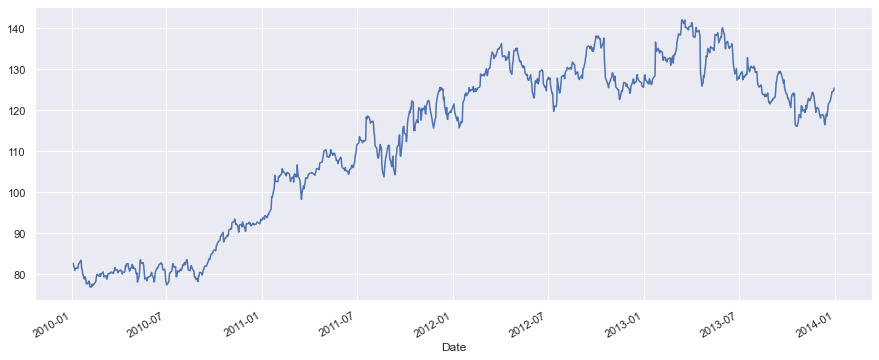

In [11]:
df['High'].plot()

<AxesSubplot:xlabel='Date'>

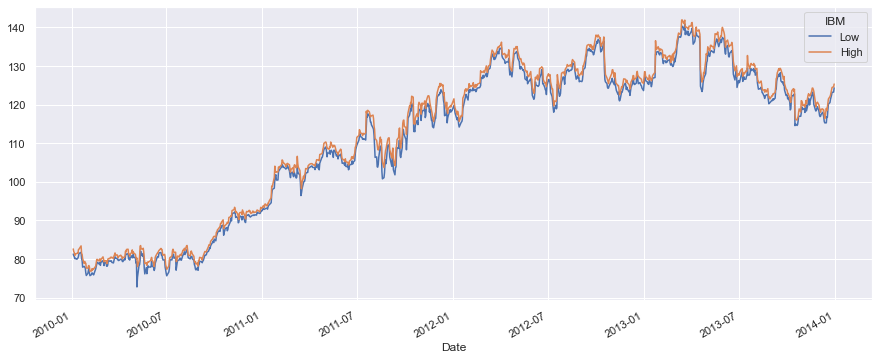

In [12]:
df[['Low', 'High']].plot()

## Test multi symbol

In [13]:
df = db.get_all_symbol_single_data_item('Close')

In [14]:
df.tail()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2013-12-24,17.902981,116.099998,27.692204,122.278084,155.709717,67.275467
2013-12-26,17.784081,116.739998,27.832178,123.699638,156.501373,68.414558
2013-12-27,17.663925,117.120003,27.855591,123.519455,156.492859,68.828201
2013-12-30,17.488260,115.389999,27.632925,124.407036,156.467300,68.014549
2013-12-31,17.693256,116.120003,27.913124,125.181229,157.207840,68.617989


In [15]:
df[['AAPL', 'IBM']].max()

Close
AAPL     21.501759
IBM     141.874649
dtype: float64

In [16]:
df = db.get_all_symbol_single_data_item('Volume')

In [17]:
df[['AAPL', 'IBM']].mean()

Volume
AAPL    5.064315e+08
IBM     5.360661e+06
dtype: float64

## Test slice

In [18]:
df = db.get_all_symbol_single_data_item('Close')

In [19]:
df_row = df.loc['2010-01-01':'2010-01-10']
df_row

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,6.526019,109.800003,15.610239,82.284225,88.860397,42.336411
2010-01-05,6.537303,109.699997,15.541497,81.290222,89.095604,42.501709
2010-01-06,6.433318,111.510002,15.149715,80.762177,89.158340,42.869057
2010-01-07,6.421425,110.820000,14.797037,80.482620,89.534714,42.734367
2010-01-08,6.464118,111.370003,14.994298,81.290222,89.832649,42.562931


In [20]:
df_col = df[['GOOG', 'IBM']]
df_col.head()

Close,GOOG,IBM
Date,,
2010-01-04,15.610239,82.284225
2010-01-05,15.541497,81.290222
2010-01-06,15.149715,80.762177
2010-01-07,14.797037,80.482620
2010-01-08,14.994298,81.290222


In [21]:
df_both = df.loc['2010-01-01':'2010-01-10', ['AAPL', 'SPY']]
df_both

Close,AAPL,SPY
Date,,
2010-01-04,6.526019,88.860397
2010-01-05,6.537303,89.095604
2010-01-06,6.433318,89.158340
2010-01-07,6.421425,89.534714
2010-01-08,6.464118,89.832649


## Plot Data

In [22]:
def plot_data(df, title="Stock Prices", ylabel="Prices"):
    """Plot the data frame"""
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    plt.grid()

## Test normalize

In [23]:
df = db.get_all_symbol_single_data_item('Close').loc[:, ['AAPL', 'GLD', 'IBM', 'SPY']]

In [24]:
df2 = fu.normalize_data_frame(df)

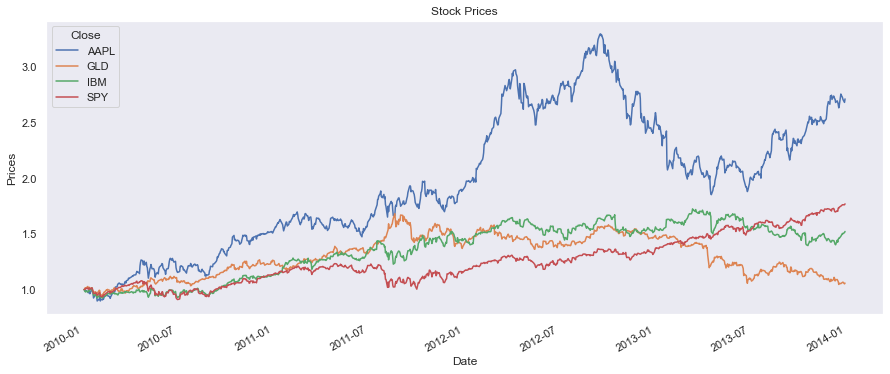

In [25]:
plot_data(df2)

## Plot selected

In [26]:
def plot_selected(df, stocks, sd, ed):
    df2 = df.loc[sd:ed, stocks]
    plot_data(df2)

## Test Plot

In [27]:
df = db.get_all_symbol_single_data_item('Close')

In [28]:
df2 = fu.normalize_data_frame(df)

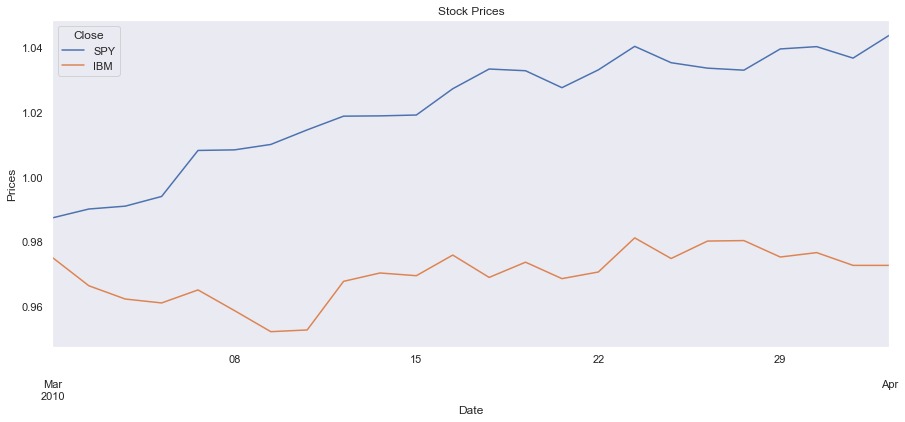

In [29]:
plot_selected(df2, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')

## Test np arrays

In [30]:
np.ones(4)

array([1., 1., 1., 1.])

In [31]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [32]:
np.random.rand(2, 3)

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411]])

In [33]:
np.random.randn(2, 3)

array([[ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351]])

In [34]:
a = np.random.randn(5)
a

array([0.76103773, 0.12167502, 0.44386323, 0.33367433, 1.49407907])

In [35]:
indices = np.array([1,1,2,3])

In [36]:
a[indices]

array([0.12167502, 0.12167502, 0.44386323, 0.33367433])

In [37]:
a = np.array([(20,25,10,23,26,32,10,5,0), (0,2,50,20,0,1,28,5,0)])
a

array([[20, 25, 10, 23, 26, 32, 10,  5,  0],
       [ 0,  2, 50, 20,  0,  1, 28,  5,  0]])

In [38]:
m = a.mean()
m

14.277777777777779

In [39]:
a[a < m]

array([10, 10,  5,  0,  0,  2,  0,  1,  5,  0])

In [40]:
# Changing values
a[a < m] = -1
a

array([[20, 25, -1, 23, 26, 32, -1, -1, -1],
       [-1, -1, 50, 20, -1, -1, 28, -1, -1]])

In [41]:
a = np.array([(1,2,3,4,5), (10,20,30,40,50)])
a

array([[ 1,  2,  3,  4,  5],
       [10, 20, 30, 40, 50]])

In [42]:
a * 2

array([[  2,   4,   6,   8,  10],
       [ 20,  40,  60,  80, 100]])

In [43]:
a / 2.0

array([[ 0.5,  1. ,  1.5,  2. ,  2.5],
       [ 5. , 10. , 15. , 20. , 25. ]])

## Get Data

In [44]:
def get_data(symbols, dates):
    df = db.get_all_symbol_single_data_item('Close')
    df = df.loc[:, symbols]  # keep only required symbols
    df = df.reindex(dates)  # keep only required dates
    df = df.dropna()  # flush nan
    return df

## Test time series

In [45]:
dates = pd.date_range('2010-01-01', '2012-12-31')
dates

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D')

In [46]:
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']

In [47]:
df = get_data(symbols, dates)

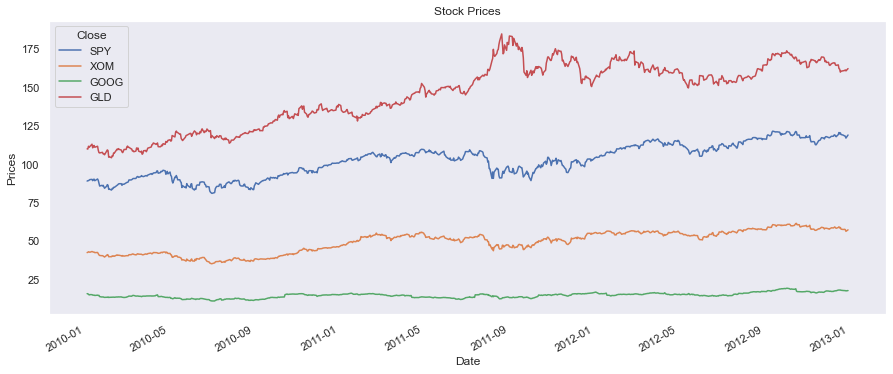

In [48]:
plot_data(df)

In [49]:
df.mean()

Close
SPY     102.031213
XOM      49.147169
GOOG     14.503417
GLD     145.029775
dtype: float64

In [50]:
df.median()

Close
SPY     102.995293
XOM      51.258164
GOOG     14.578232
GLD     150.294998
dtype: float64

In [51]:
df.std()

Close
SPY     10.598443
XOM      7.128064
GOOG     1.650532
GLD     20.897316
dtype: float64

In [52]:
df.describe()

Close,SPY,XOM,GOOG,GLD
count,754.000000,754.000000,754.000000,754.000000
mean,102.031213,49.147169,14.503417,145.029775
std,10.598443,7.128064,1.650532,20.897316
min,80.846306,35.097107,10.861040,104.040001
25%,93.308434,42.256723,13.254382,128.077499
50%,102.995293,51.258164,14.578232,150.294998
75%,110.386925,55.037309,15.397038,162.004998
max,121.336853,61.315384,19.129547,184.589996


## Test rolling stats

Ref: https://pandas.pydata.org/docs/user_guide/window.html

In [53]:
c = db.get_symbol_data('SPY').loc[:, 'Close']

In [54]:
r = c.rolling(window=60)

In [55]:
d = {
        'raw':  c,
        'mean': r.mean(),
        'min':  r.min(),
        'max':  r.max(),
        'std':  r.std()
    }

In [56]:
df = pd.DataFrame(d)

<AxesSubplot:xlabel='Date'>

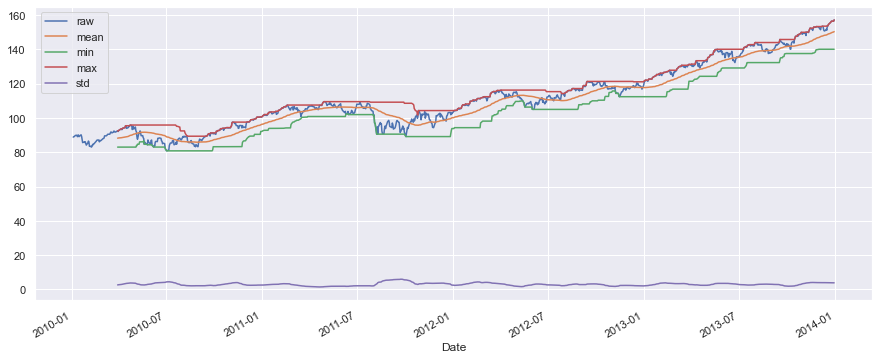

In [57]:
df.plot()

## Bolligner bands

In [58]:
def get_bollinger_bands(series, window):
    r = series.rolling(window=window)
    rm = r.mean()
    rs = r.std()
    upper_band = rm + 2.0 * rs
    lower_band = rm - 2.0 * rs

    return rm, upper_band, lower_band

## Test bolligner bands

In [59]:
df = get_data(['SPY'], pd.date_range('2010-01-01', '2014-01-01'))

In [60]:
rolling_mean, upper_band, lower_band = get_bollinger_bands(df['SPY'], 20)

<AxesSubplot:title={'center':'SPY Bollinger Bands'}>

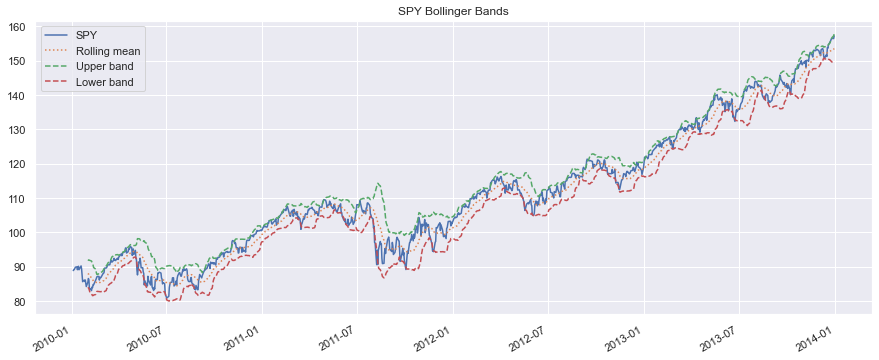

In [61]:
ax = df['SPY'].plot(title='SPY Bollinger Bands', label='SPY', legend=True)
rolling_mean.plot(style=':', label='Rolling mean', ax=ax, legend=True)
upper_band.plot(style='--', label='Upper band', ax=ax, legend=True)
lower_band.plot(style='--', label='Lower band', ax=ax, legend=True)

## Test daily returns

Lesson 5.10

In [62]:
dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)

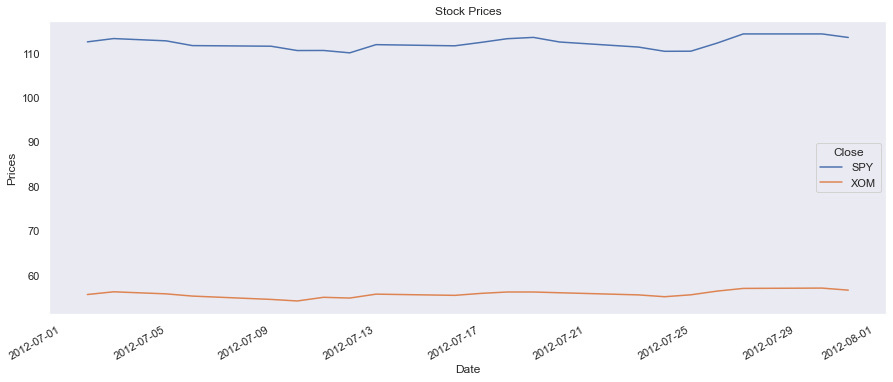

In [63]:
plot_data(df)

In [64]:
dr = df.pct_change() * 100.0  # make it directly in %

In [65]:
dr.iloc[0] = 0.0  # asked by quiz, not sure it makes sense

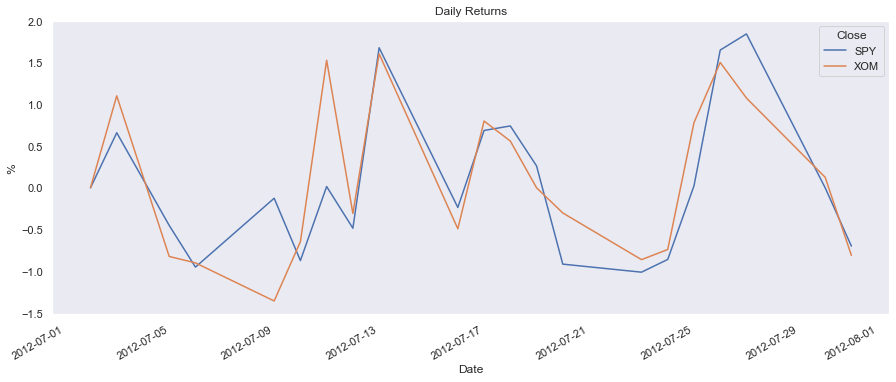

In [66]:
plot_data(dr, title='Daily Returns', ylabel='%')

<AxesSubplot:>

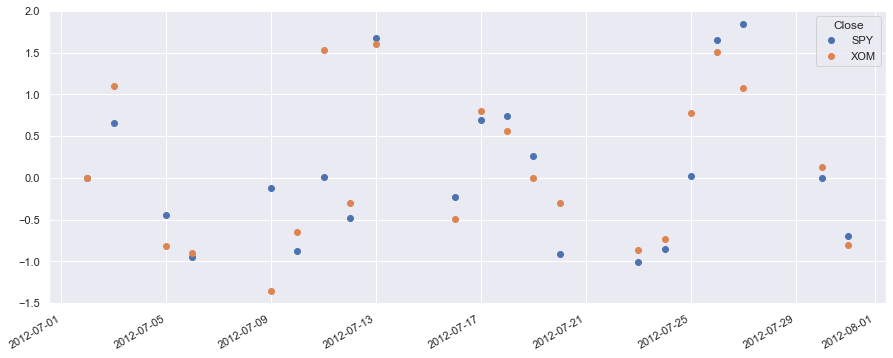

In [67]:
dr.plot(marker='o', linestyle='')  # alternate plot style

## Test cummulative returns

Lesson 5.12

In [68]:
dates = pd.date_range('2012-01-01', '2012-12-31')  # one year

In [69]:
symbols = ['SPY', 'XOM']

In [70]:
df = get_data(symbols, dates)

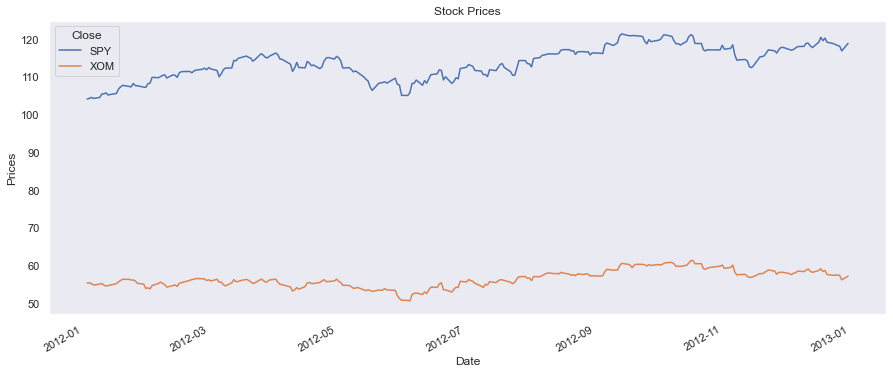

In [71]:
plot_data(df)

In [72]:
# Compute cummulative returns
cr = (df / df.iloc[0] - 1.0) * 100.0  # make it in % directly

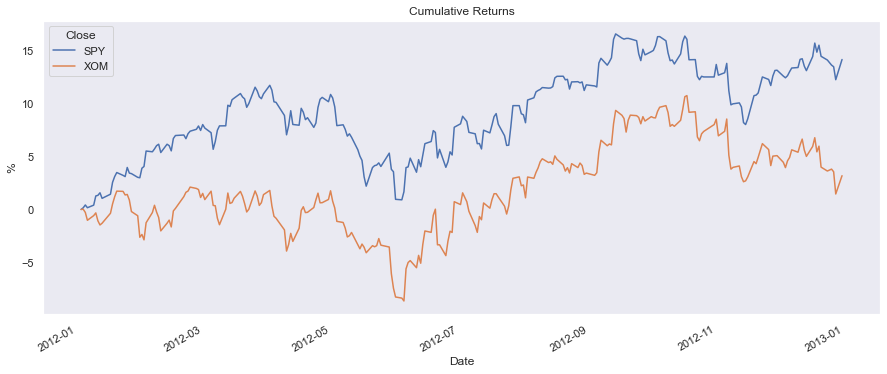

In [73]:
plot_data(cr, title='Cumulative Returns', ylabel='%')

## Test missing data

Ref: https://pandas.pydata.org/docs/user_guide/missing_data.html

In [74]:
db = sdm.StockDBMgr('stock_db/test', '2002-01-01', '2008-01-01')

In [75]:
df_gap = db.get_all_symbol_single_data_item('Close')

<AxesSubplot:xlabel='Date'>

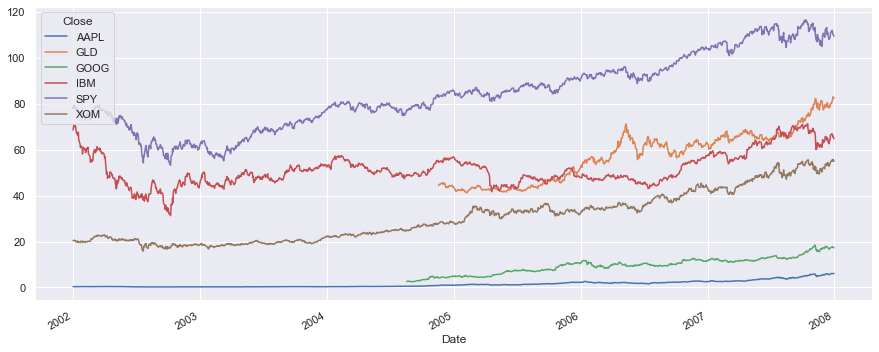

In [76]:
df_gap.plot()

In [77]:
df = fu.fill_nan_data(df_gap)

<AxesSubplot:xlabel='Date'>

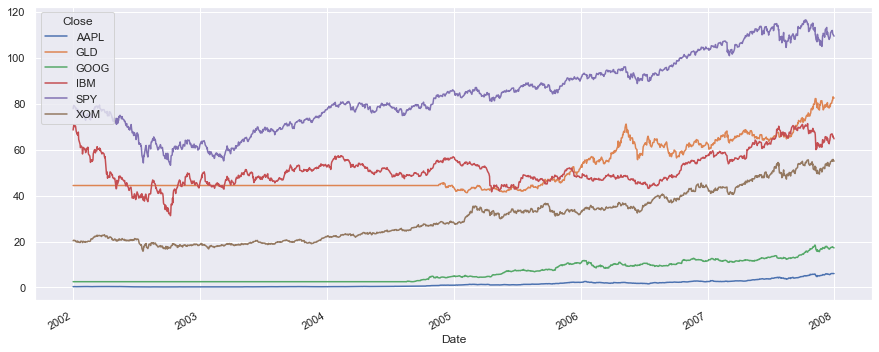

In [78]:
df.plot()

# Lesson 7

In [79]:
db = sdm.StockDBMgr('stock_db/test', '2010-01-01')

In [80]:
df = db.get_all_symbol_single_data_item('Close')

In [81]:
df.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,6.526019,109.800003,15.610239,82.284225,88.860397,42.336411
2010-01-05,6.537303,109.699997,15.541497,81.290222,89.095604,42.501709
2010-01-06,6.433318,111.510002,15.149715,80.762177,89.158340,42.869057
2010-01-07,6.421425,110.820000,14.797037,80.482620,89.534714,42.734367
2010-01-08,6.464118,111.370003,14.994298,81.290222,89.832649,42.562931


In [82]:
# Get daily returns (pc = percent)
pc = df.pct_change()
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003904
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004221,-0.003142
2010-01-08,0.006649,0.004963,0.013331,0.010034,0.003328,-0.004012


In [83]:
# To not have na for first value.
pc.iloc[0] = 0.0

In [84]:
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003904
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004221,-0.003142
2010-01-08,0.006649,0.004963,0.013331,0.010034,0.003328,-0.004012


## Histogram

<AxesSubplot:>

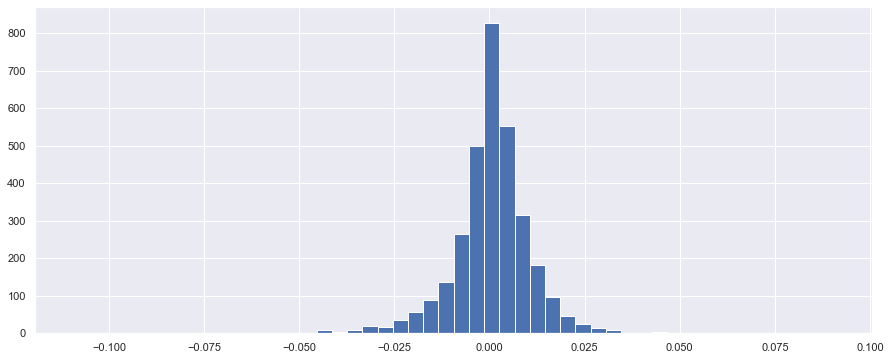

In [85]:
# Basic histogram
pc['SPY'].hist(bins=50)

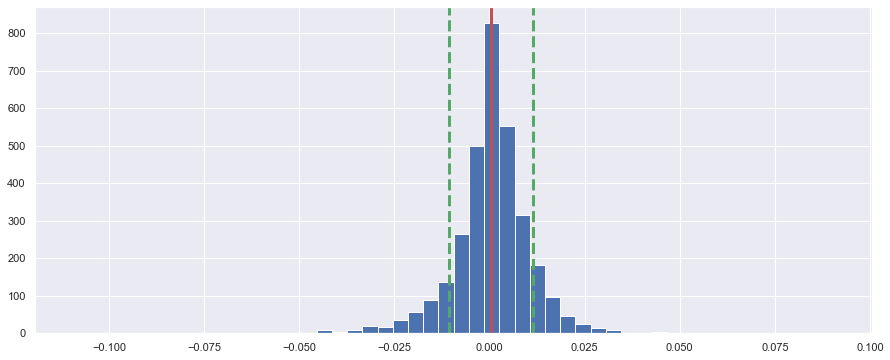

In [86]:
# With std & mean
# TBD bug in lesson: missing std +/- mean.
pc['SPY'].hist(bins=50)
plt.axvline(pc['SPY'].mean(), color='r', linewidth=3)
plt.axvline(pc['SPY'].mean() - pc['SPY'].std(), color='g', linewidth=3, linestyle='dashed')
plt.axvline(pc['SPY'].mean() + pc['SPY'].std(), color='g', linewidth=3, linestyle='dashed')

In [87]:
def plot_histogram(s, bins=50):
    s.hist(bins=bins)
    plt.axvline(s.mean(), color='r', linewidth=3)
    plt.axvline(s.mean() - s.std(), color='g', linewidth=3, linestyle='dashed')
    plt.axvline(s.mean() + s.std(), color='g', linewidth=3, linestyle='dashed')

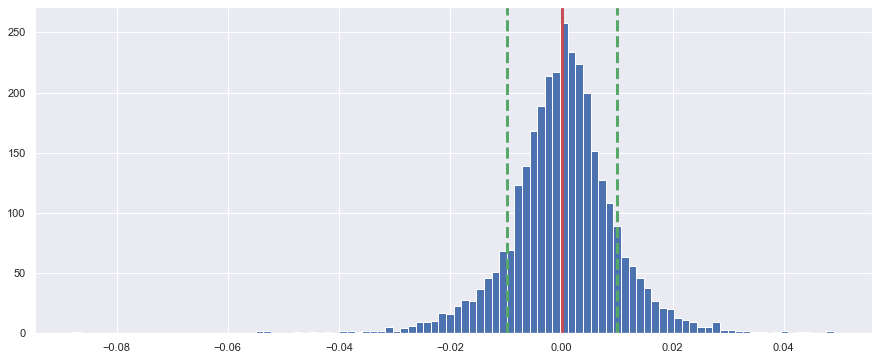

In [88]:
plot_histogram(pc['GLD'], 100)

## Statistical info

Statistics moment:
1. mean
2. std dev
3. skewness:
    * negative skew indicates that the tail is on the left side of the distribution
    * positive skew indicates that the tail is on the right
4. kurtosis: how the tails are thick
    * A distribution with positive excess kurtosis is called leptokurtic, and has fatter tails
    * A distribution with negative excess kurtosis is called platykurtic, and has thinner tails

In [89]:
desc = df.pct_change().describe()
desc.rename_axis('Symbol', axis=1, inplace=True)
desc.rename_axis('Parameter', axis=0, inplace=True)
desc

Symbol,AAPL,GLD,GOOG,IBM,SPY,XOM
Parameter,,,,,,
count,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000
mean,0.001145,0.000151,0.000701,0.000262,0.000516,0.000420
std,0.017986,0.009866,0.016898,0.014199,0.011035,0.015955
min,-0.128647,-0.087808,-0.111008,-0.128507,-0.109424,-0.122248
25%,-0.007419,-0.004876,-0.006823,-0.006230,-0.003709,-0.006898
50%,0.000942,0.000421,0.000683,0.000436,0.000669,0.000124
75%,0.010667,0.005360,0.008865,0.007051,0.005699,0.007789
max,0.119808,0.049038,0.160524,0.113011,0.090604,0.126868


In [90]:
# Add more info
desc.loc['skew'] = pc.skew()
desc.loc['kurt'] = pc.kurtosis()
desc

Symbol,AAPL,GLD,GOOG,IBM,SPY,XOM
Parameter,,,,,,
count,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000
mean,0.001145,0.000151,0.000701,0.000262,0.000516,0.000420
std,0.017986,0.009866,0.016898,0.014199,0.011035,0.015955
min,-0.128647,-0.087808,-0.111008,-0.128507,-0.109424,-0.122248
25%,-0.007419,-0.004876,-0.006823,-0.006230,-0.003709,-0.006898
50%,0.000942,0.000421,0.000683,0.000436,0.000669,0.000124
75%,0.010667,0.005360,0.008865,0.007051,0.005699,0.007789
max,0.119808,0.049038,0.160524,0.113011,0.090604,0.126868
skew,-0.090389,-0.459778,0.450146,-0.494043,-0.569001,0.059733


In [91]:
def get_stat_info(s):
    return {
        'min' : s.min(),
        'max' : s.max(),
        'mean': s.mean(),
        'std' : s.std(),
        'skew': s.skew(),
        'kurt': s.kurt()
    }

## Scatterplots

In [92]:
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003904
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004221,-0.003142
2010-01-08,0.006649,0.004963,0.013331,0.010034,0.003328,-0.004012


Notes:
* Slope is Beta
* Offset is Alpha
* Slope is NOT correlation
* Correlation is how tight the points are to the line fitting

<AxesSubplot:xlabel='SPY', ylabel='IBM'>

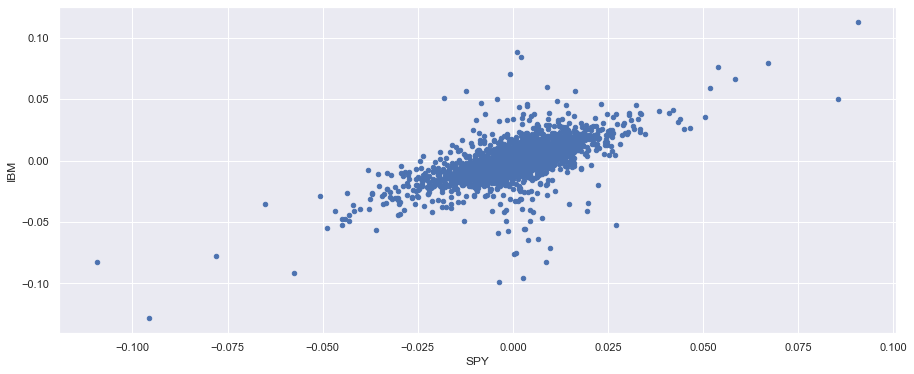

In [93]:
# Strangely, without color argument, we get a warning
pc.plot(x='SPY', y='IBM', kind='scatter', color='b')

<AxesSubplot:xlabel='SPY', ylabel='GLD'>

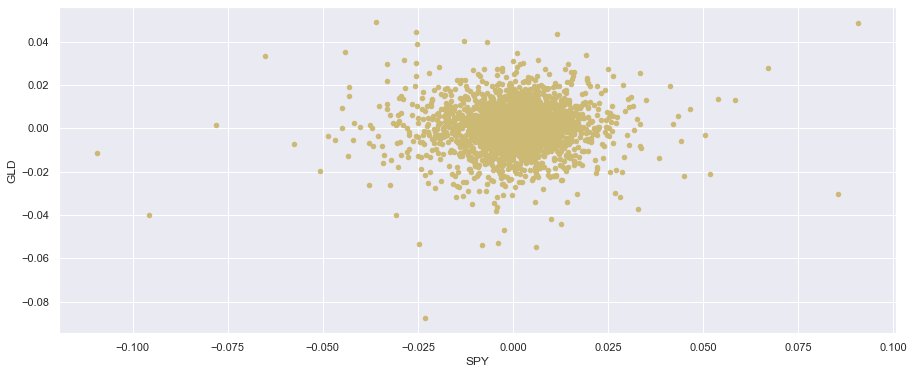

In [94]:
pc.plot(x='SPY', y='GLD', kind='scatter', color='y')

### Regression line

In [95]:
beta, alpha = np.polyfit(pc['SPY'], pc['IBM'], 1)

In [96]:
(beta, alpha)

(0.8453785139713713, -0.0001741392211413792)

In [97]:
pc['SPY'].min(), pc['SPY'].max()

(-0.10942379087121723, 0.09060360911525045)

In [98]:
x = np.linspace(pc['SPY'].min(), pc['SPY'].max(), 10)

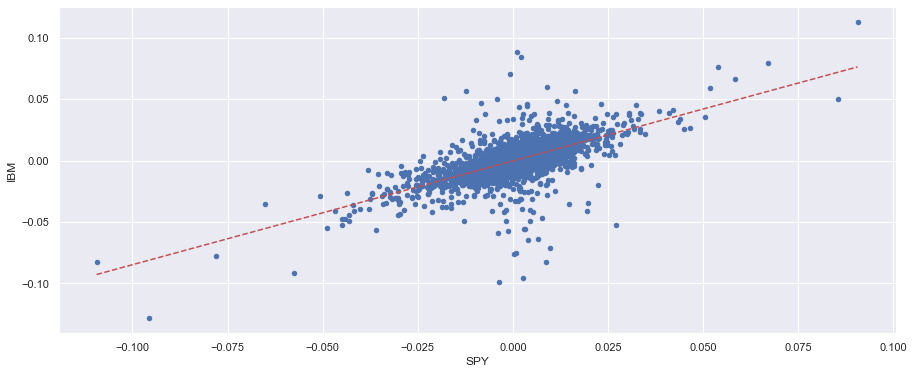

In [99]:
pc.plot(x='SPY', y='IBM', kind='scatter', color='b')
plt.plot(x, x * beta + alpha, linestyle='--', color='r')

In [100]:
def plot_correlation(df, s1, s2):
    beta, alpha = np.polyfit(df[s1], df[s2], 1)
    x = np.linspace(df[s1].min(), df[s1].max(), 20)
    df.plot(x=s1, y=s2, kind='scatter', color='b')
    plt.plot(x, x * beta + alpha, linestyle='--', color='r')
    return (beta, alpha)    

(0.9229705648065096, -5.616888347864087e-05)

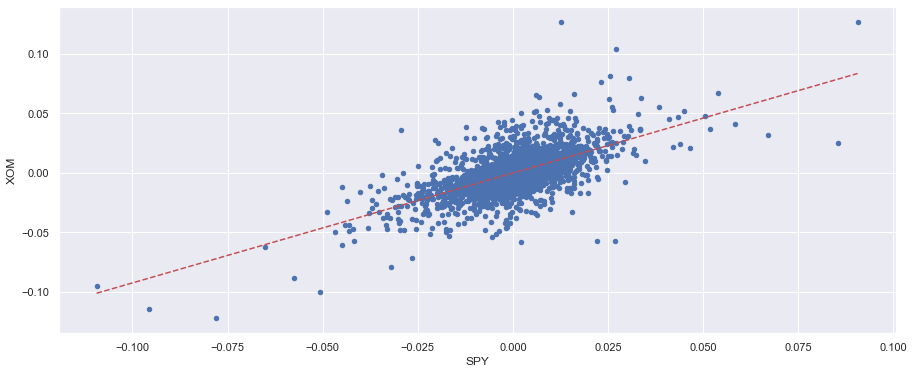

In [101]:
plot_correlation(pc, 'SPY', 'XOM')

(0.03192531321178373, 0.00013458778852925958)

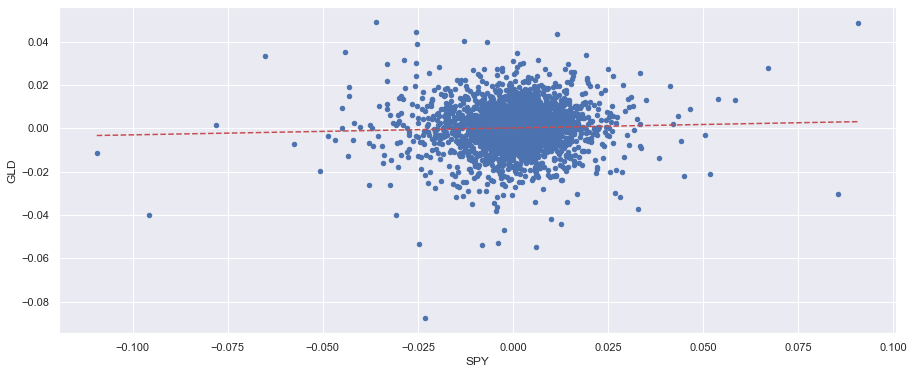

In [102]:
plot_correlation(pc, 'SPY', 'GLD')

## Correlation

In [103]:
pc.corr()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Close,,,,,,
AAPL,1.000000,0.045945,0.554343,0.409693,0.683187,0.330524
GLD,0.045945,1.000000,0.008027,0.018253,0.035708,0.057964
GOOG,0.554343,0.008027,1.000000,0.420023,0.700545,0.368080
IBM,0.409693,0.018253,0.420023,1.000000,0.656995,0.509181
SPY,0.683187,0.035708,0.700545,0.656995,1.000000,0.638358
XOM,0.330524,0.057964,0.368080,0.509181,0.638358,1.000000


In [104]:
pc.corr().min()

Close
AAPL    0.045945
GLD     0.008027
GOOG    0.008027
IBM     0.018253
SPY     0.035708
XOM     0.057964
dtype: float64

In [105]:
pc.corr().idxmin()

Close
AAPL     GLD
GLD     GOOG
GOOG     GLD
IBM      GLD
SPY      GLD
XOM      GLD
dtype: object

## My experimentations

### Is it normal distribution?

In [106]:
pc.iloc[0]

Close
AAPL    0.0
GLD     0.0
GOOG    0.0
IBM     0.0
SPY     0.0
XOM     0.0
Name: 2010-01-04 00:00:00, dtype: float64

In [107]:
r = pd.Series(np.random.randn(len(pc['SPY'])))
# 0 mean
r = r - r.mean()
# same std
r = r / r.std() * pc['SPY'].std()
# put back same mean
r = r + pc['SPY'].mean()
# same starting value
r[0] = 0.0

In [108]:
get_stat_info(r)

{'min': -0.03440978968580244,
 'max': 0.044000256109873896,
 'mean': 0.0005159623586318105,
 'std': 0.011033394131767908,
 'skew': 0.054656732738912056,
 'kurt': -0.03025370847624087}

In [109]:
get_stat_info(pc['SPY'])

{'min': -0.10942379087121723,
 'max': 0.09060360911525045,
 'mean': 0.0005155255476767254,
 'std': 0.011033442484922613,
 'skew': -0.5690006433205911,
 'kurt': 11.057964374315828}

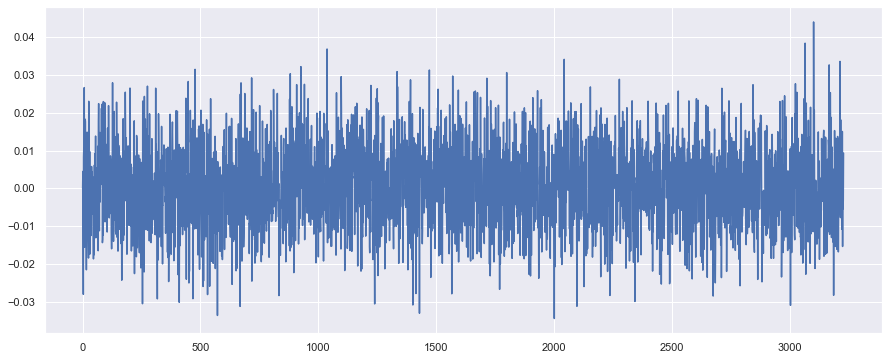

In [110]:
plt.plot(r)

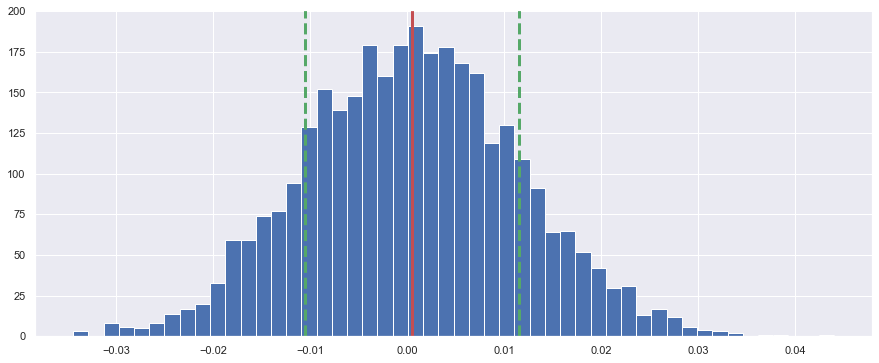

In [111]:
plot_histogram(r)

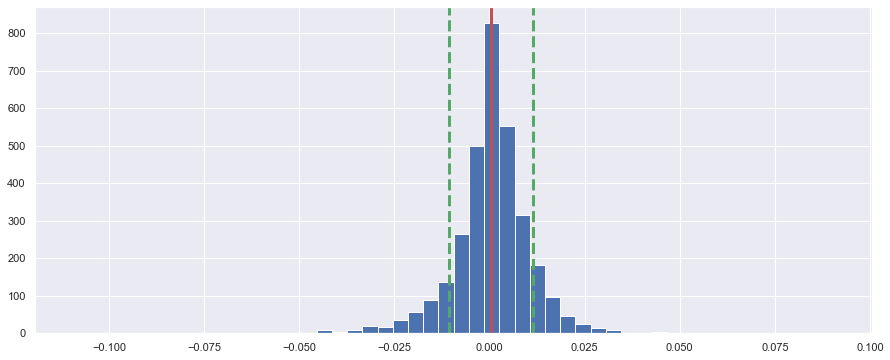

In [112]:
plot_histogram(pc['SPY'])

In [113]:
df['SPY'].iloc[0]

88.86039699999999

<AxesSubplot:>

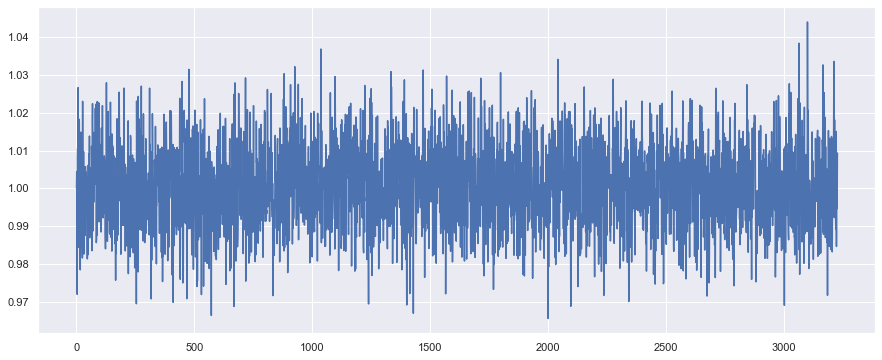

In [114]:
(r + 1).plot()

In [115]:
(r + 1).cumprod()

0       1.000000
1       1.004463
2       0.995659
3       0.967761
4       0.975815
          ...   
3224    4.314824
3225    4.343156
3226    4.319677
3227    4.306329
3228    4.346528
Length: 3229, dtype: float64

In [116]:
(pc['SPY'] + 1).cumprod()

Date
2010-01-04    1.000000
2010-01-05    1.002647
2010-01-06    1.003353
2010-01-07    1.007588
2010-01-08    1.010941
                ...   
2022-10-24    4.263654
2022-10-25    4.331739
2022-10-26    4.299103
2022-10-27    4.276146
2022-10-28    4.335902
Name: SPY, Length: 3229, dtype: float64

<AxesSubplot:xlabel='Date'>

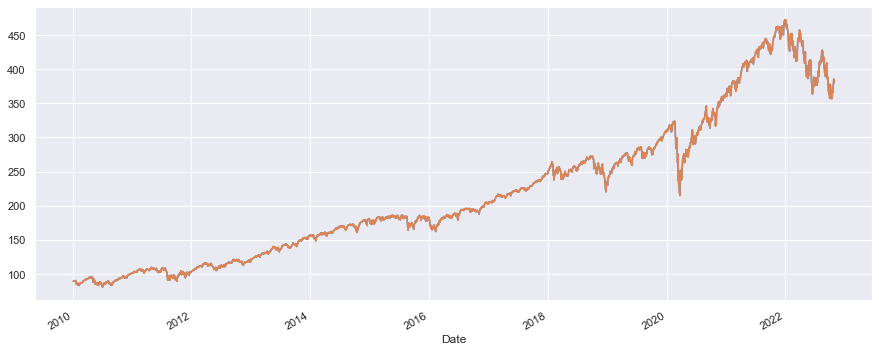

In [117]:
# Same chart reconstruction from % change
((pc['SPY'] + 1).cumprod() * df['SPY'].iloc[0]).plot()
df['SPY'].plot()

<AxesSubplot:>

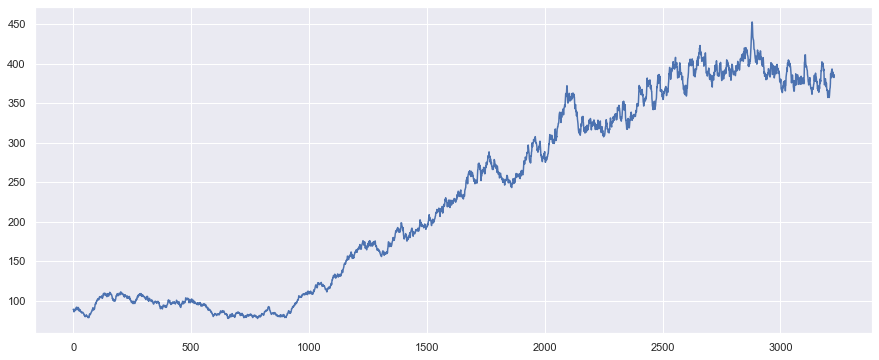

In [118]:
((r + 1).cumprod() * df['SPY'].iloc[0]).plot()

### Is it random walk?

TBD move to tradesim notebook.

(0.0, 300.0)

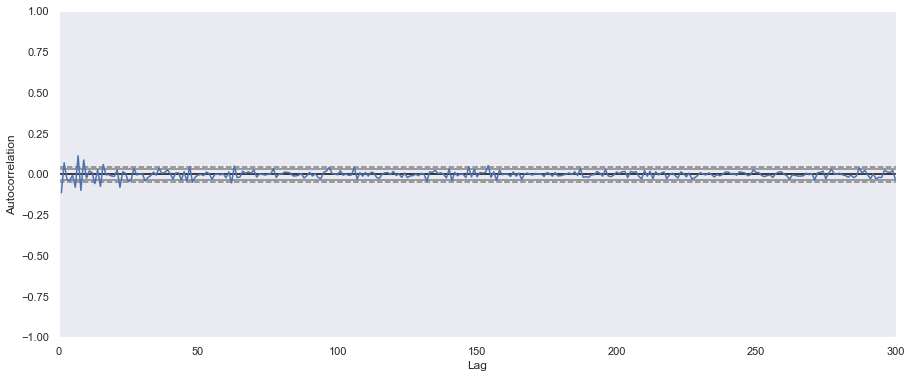

In [119]:
pd.plotting.autocorrelation_plot(pc['SPY']).set_xlim([0, 300])

(0.0, 300.0)

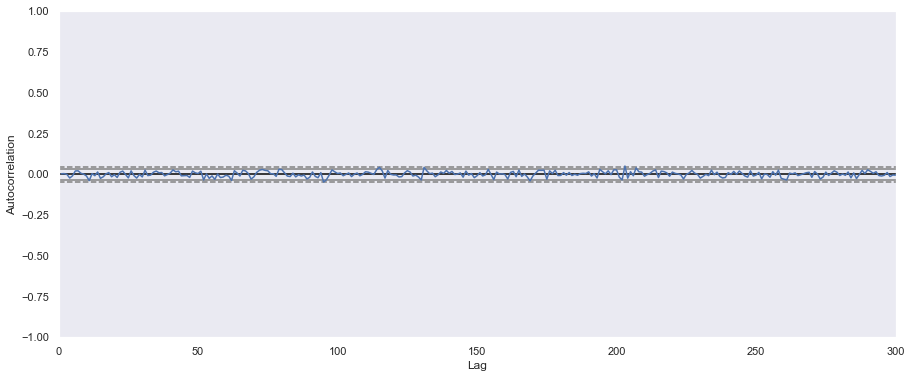

In [120]:
pd.plotting.autocorrelation_plot(r).set_xlim([0, 300])

# Lesson 8

In [121]:
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
allocs = np.array([.4, .4, .1, .1])
start_val = 1000 # $
allocs.sum()

1.0

In [122]:
# Keep only the stocks we want:
df = df[symbols]

In [123]:
df.isna().any(1).any()

False

In [124]:
df.head()

Close,SPY,XOM,GOOG,GLD
Date,,,,
2010-01-04,88.860397,42.336411,15.610239,109.800003
2010-01-05,89.095604,42.501709,15.541497,109.699997
2010-01-06,89.158340,42.869057,15.149715,111.510002
2010-01-07,89.534714,42.734367,14.797037,110.820000
2010-01-08,89.832649,42.562931,14.994298,111.370003


## Portfolio value

<AxesSubplot:xlabel='Date'>

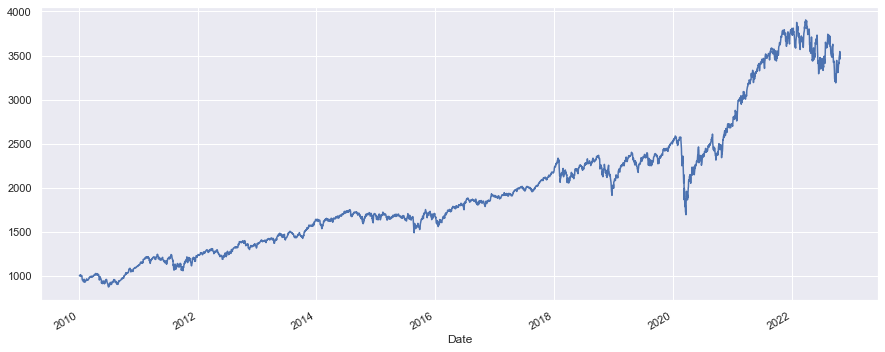

In [125]:
# Quick plot of our portfolio
port_val = ((df / df.iloc[0]) * allocs * start_val).sum(1)
port_val.plot()

## Daily returns

In [126]:
daily_rets = port_val.pct_change().iloc[1:]

<AxesSubplot:xlabel='Date'>

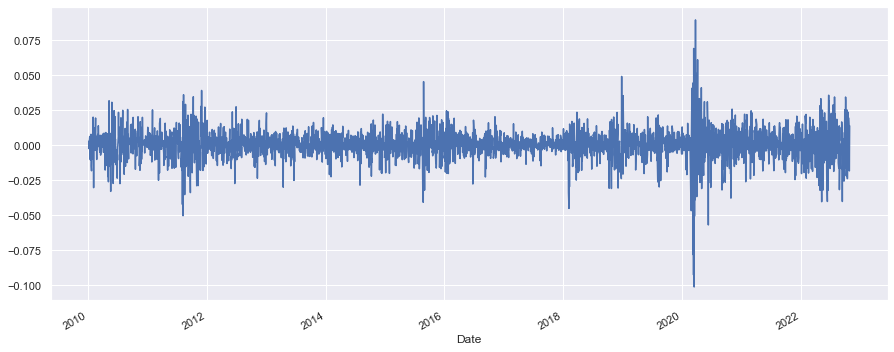

In [127]:
daily_rets.plot()

## Cumulative returns

In [128]:
(port_val[-1] / port_val[0]) - 1

2.508564658118602

## Average daily returns

In [129]:
daily_rets.mean()

0.0004461200506984586

## Std dev daily returns

Also referred as risk.

In [130]:
daily_rets.std()

0.010675605524243553

## Sharpe ratio

Risk-free rate: approximated as zero.  Could vary depending on economic situation.

In [131]:
(daily_rets - 0).mean() / (daily_rets - 0).std()

0.04178873504508491

Note: there is 252 trading days per year.

In [132]:
len(df.loc['2010-01-01':'2010-12-31'])

252

In [133]:
np.sqrt(252)

15.874507866387544

k = sqrt(nb samples per years)

In [134]:
np.sqrt(252) * ((daily_rets - 0).mean() / (daily_rets - 0).std())

0.6633756031995852

In [135]:
# Test
np.sqrt(252) * (10./100/100 - 2./100/100) / (10./100/100)

12.699606293110037

## Combined

Function to get
* Cummulative return
* Average daily return
* Risk
* Sharpe ratio

In [136]:
def portfolio_param(port_val, nb_trading_day_per_year=252, risk_free_rate_of_return=0):
    daily_rets = port_val.pct_change()
    daily_rets.iloc[0] = 0

    daily_rf = np.power(1.0 + risk_free_rate_of_return, 1.0/nb_trading_day_per_year) - 1
    
    return {
        'Cummulative return': (port_val.iloc[-1] / port_val.iloc[0]) - 1,
        'Average daily return': daily_rets.mean(),
        'Risk': daily_rets.std(),
        'Sharpe ratio': np.sqrt(nb_trading_day_per_year) * ((daily_rets - daily_rf).mean() / (daily_rets - daily_rf).std())
    }

In [137]:
portfolio_param(port_val)

{'Cummulative return': 2.508564658118602,
 'Average daily return': 0.00044598189026157455,
 'Risk': 0.010673954688966977,
 'Sharpe ratio': 0.6632727261379191}

# Trades test

TBD move to tradesim notebook...

<AxesSubplot:xlabel='Date'>

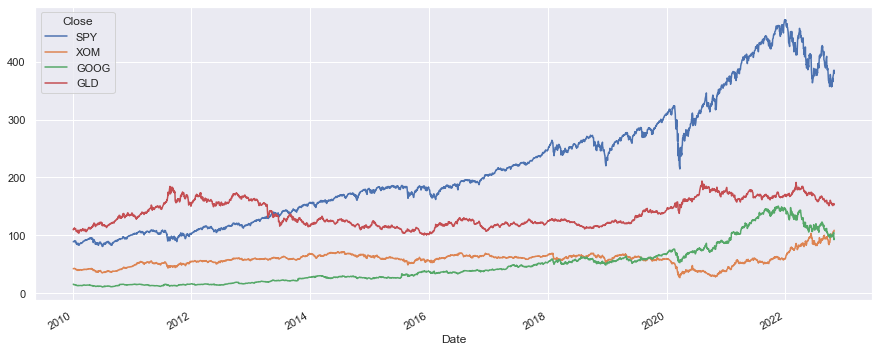

In [138]:
df.plot()

<AxesSubplot:xlabel='Date'>

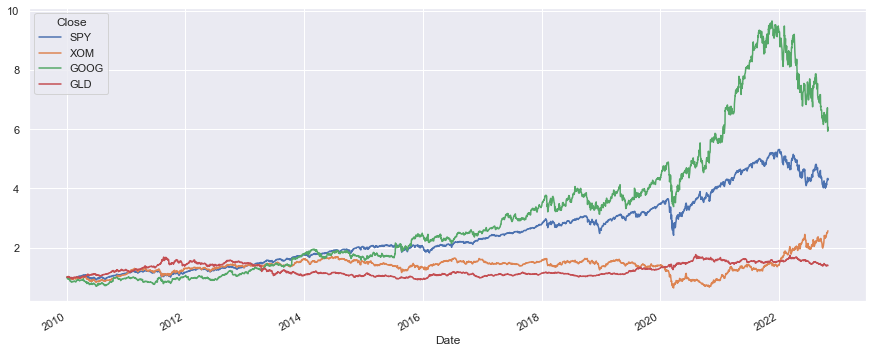

In [139]:
fu.normalize_data_frame(df).plot()

<AxesSubplot:xlabel='Date'>

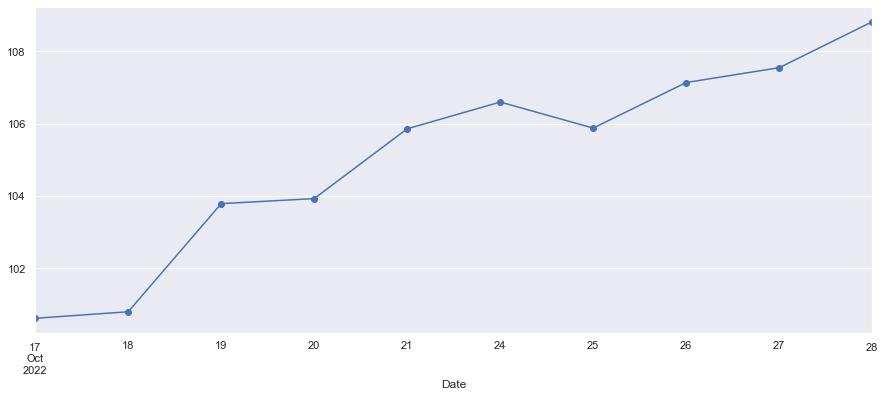

In [140]:
n = 10
df2 = df.iloc[-n:].loc[:, 'XOM']
df2.plot(marker='o')

In [141]:
df2.iloc[0]

100.620003

In [142]:
df2.iloc[-1]

108.82

In [143]:
(df2.iloc[-1] - df2.iloc[0]) / df2.iloc[0]

0.08149470041260083

In [144]:
df2.iloc[-1] / df2.iloc[0] - 1

0.08149470041260076

<AxesSubplot:xlabel='Date'>

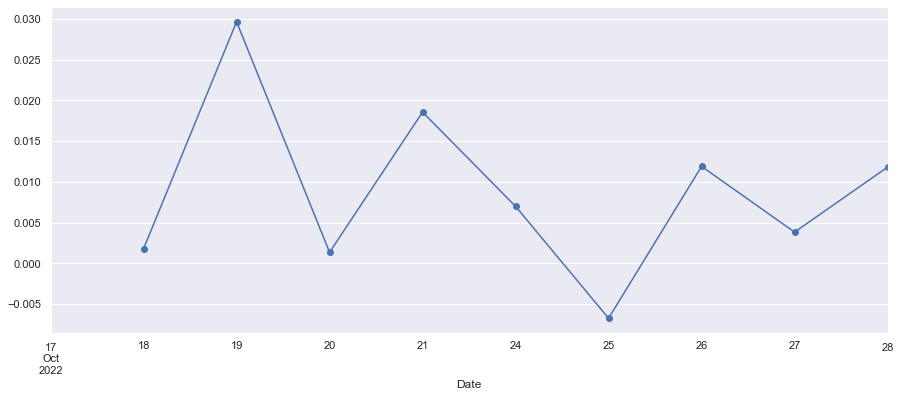

In [145]:
df2.pct_change().plot(marker='o')

In [146]:
(df2.pct_change() + 1).prod() - 1

0.08149470041260098

In [147]:
(df2.pct_change()[df2.pct_change() > 0] + 1).prod() - 1

0.08884903822762524

In [148]:
s = pd.Series([12, 10, 15, 13, 16], list('abcde'))
s

a    12
b    10
c    15
d    13
e    16
dtype: int64

<AxesSubplot:>

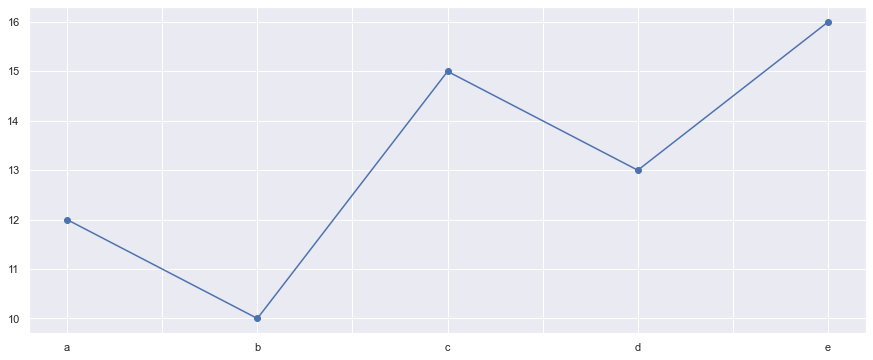

In [149]:
s.plot(marker='o')

In [150]:
s['e']/s['a']

1.3333333333333333

In [151]:
15/10. * 16 /13.

1.8461538461538463

In [152]:
(s.pct_change()[s.pct_change() > 0] + 1).prod() - 1

0.8461538461538463

In [153]:
# Real value
s = df.loc[:, 'GLD']

<AxesSubplot:xlabel='Date'>

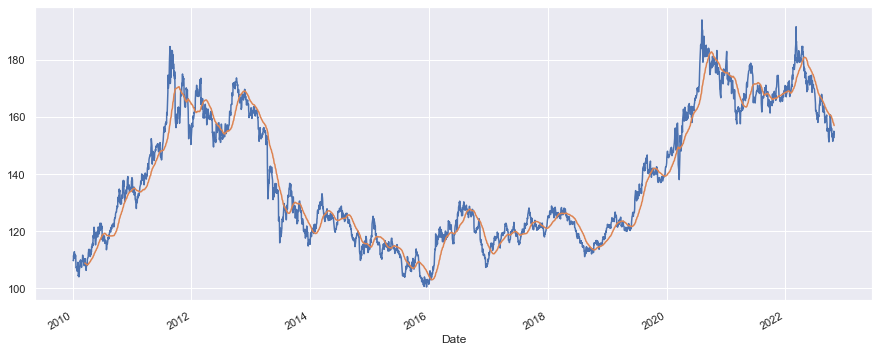

In [154]:
s.plot()
s.rolling(50).mean().plot()

In [155]:
# Buy and hold gain:
s[-1] / s[0] - 1

0.391165717909862

In [156]:
# If only trading positive days (theorical max cumulative return):
(s.pct_change()[s.pct_change() > 0] + 1).prod() - 1

105477.01191692903

# Lesson 9

## Minimizer

In [157]:
def f(x):
    y = (x - 1.5) ** 2 + 0.5
    #print("x = %f, y = %f" % (x, y))  # Temp to debug minimizer
    return y

In [158]:
f(2.0)

0.75

In [159]:
x = np.linspace(-1, 4, 100)
y = f(x)

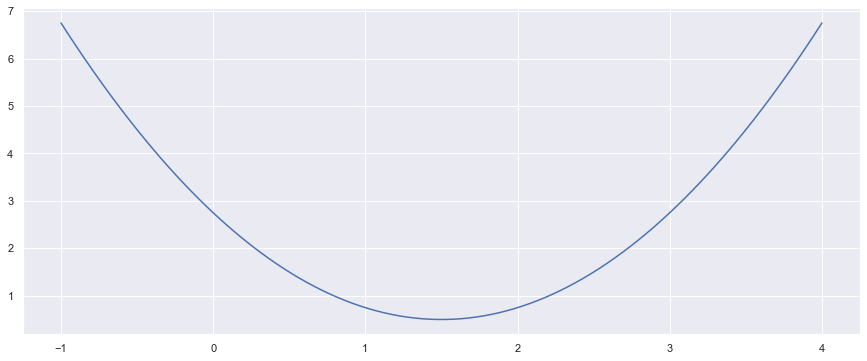

In [160]:
plt.plot(x, y)

In [161]:
sp.optimize.minimize(f, 5, method='SLSQP', options={'disp': True, 'maxiter': 10})

Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.5]
            Iterations: 2
            Function evaluations: 5
            Gradient evaluations: 2


     fun: array([0.5])
     jac: array([1.49011612e-08])
 message: 'Optimization terminated successfully'
    nfev: 5
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.5])

## Polynomial

In [162]:
# Descending order of coefficient
np.polyval([.1, 1, 2], 45)

249.5

In [163]:
def error_poly(c, x, y):
    return np.sum((y - np.polyval(c, x)) ** 2)

In [164]:
poly = [.1, -1.5, 1]

In [165]:
x = np.arange(0, 15)

In [166]:
y = np.polyval(poly, x)

In [167]:
yr = y + .5* np.random.randn(len(y))

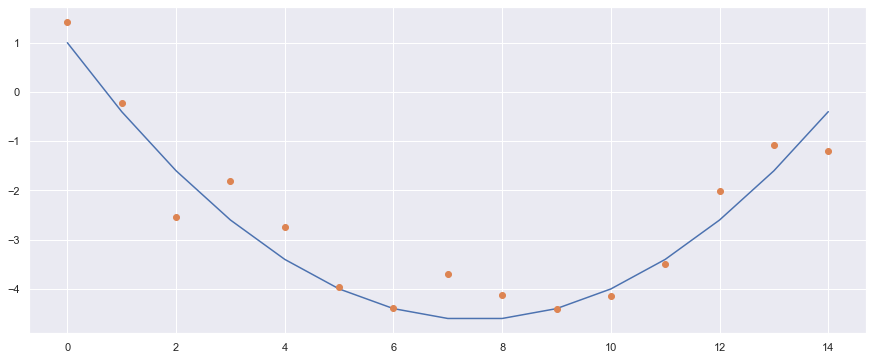

In [168]:
plt.plot(x, y, '-')
plt.plot(x, yr, 'o')

In [169]:
error_poly(poly, x, y)

0.0

In [170]:
error_poly(poly, x, yr)

4.467090048043776

In [171]:
res = sp.optimize.minimize(error_poly, np.ones(3), args=(x, yr), method='SLSQP', options={'disp': True})
res.x

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.6700925417756958
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 7


array([ 0.09166813, -1.39931485,  1.03012716])

## Polyfit

In [172]:
np.polyfit(x, y, 2)

array([ 0.1, -1.5,  1. ])

In [173]:
polyr = np.polyfit(x, yr, 2)
polyr

array([ 0.09166834, -1.39931771,  1.03013324])

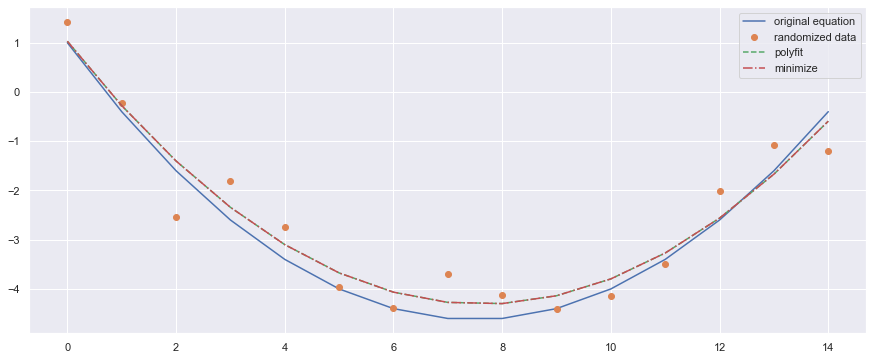

In [174]:
plt.plot(x, y, '-', label='original equation')
plt.plot(x, yr, 'o', label='randomized data')
plt.plot(x, np.polyval(polyr, x), '--', label='polyfit')
plt.plot(x, np.polyval(res.x, x), '-.', label='minimize')
plt.legend()

In [175]:
# Pretty close...
res.x - polyr

array([-2.05851277e-07,  2.85779773e-06, -6.08276840e-06])

# Lesson 10

Portfolio optimizer